# Capstone Project - Credit card fraud detection

The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. 

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Understanding Data

In [2]:
# read data

df1 = pd.read_csv("fraudTrain.csv")
df2 = pd.read_csv("fraudTest.csv")

In [3]:
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df1.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.560000,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.717500,-112.477700,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.700000,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.266700,-77.510100,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.930000,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.939600,-105.818900,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.900000,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.352600,-102.541100,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.300000,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.843300,-113.874800,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [5]:
df2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860000,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.965900,-80.935500,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840000,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.320700,-110.436000,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280000,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.672900,-73.536500,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050000,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.569700,-80.819100,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190000,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.252900,-85.017000,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df2.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.770000,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.493100,-91.891200,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.840000,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.039300,-95.440100,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.880000,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.196600,-118.901700,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.990000,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.625500,-116.449300,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.130000,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.666500,-97.479800,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [7]:
df1.shape, df2.shape

((1296675, 23), (555719, 23))

In [8]:
# drop 1st column (Unnamed: 0) from both datasets

df1 = df1.drop("Unnamed: 0", axis=1)
df2 = df2.drop("Unnamed: 0", axis=1)

df1.shape, df2.shape

((1296675, 22), (555719, 22))

In [9]:
# combine df1 & df2 datasets

df = pd.concat([df1, df2], axis = 0)

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
df.shape

(1852394, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [12]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038394006464.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210
std,1309115265318020352.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000


In [13]:
# check missing values

df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing values in df

### Distribution of dependent variable (Fraud Vs Not Fraud)

In [14]:
# display count & percentage of fraud & non fraud transactions

print(df["is_fraud"].value_counts())
(df["is_fraud"].value_counts(normalize = True)*100).reset_index()

0    1842743
1       9651
Name: is_fraud, dtype: int64


,index,is_fraud
0,0,99.478999
1,1,0.521001


Out of 1852394 transactions only 9651 are fraudulent transactions i.e 0.52%. It indicates the class imbalance problem.

Cardinality of variables.

We need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables for categorical features.

In [15]:
# checking cardinality of variables

df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

#### Derive Variables

In [16]:
# Convert "trans_date_trans_time" object to DataTime Type

df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

df["trans_date_trans_time"].dtypes

dtype('<M8[ns]')

In [17]:
# Derive 'Transaction Hour' Feature from 'Transaction Time' Feature

df['trans_hour'] = df["trans_date_trans_time"].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [18]:
# Derive 'Day of Week' Feature from 'Transaction Time' Feature

df['day_of_week'] = df["trans_date_trans_time"].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [19]:
df['day_of_week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [20]:
# Derive 'Year Month' Feature from 'Transaction Time' Feature

df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

In [21]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01


In [22]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_hour                        int64
day_of_week                      object
year_month                    period[M]


In [23]:
# Understand statewise fraud percentage

(df.groupby(by="state")["is_fraud"].mean()*100).sort_values(ascending = False)

state
DE   100.000000
RI     2.013423
AK     1.687479
OR     0.745986
NH     0.673659
VA     0.653798
TN     0.638221
NE     0.627451
MN     0.616292
NY     0.611293
DC     0.604288
KS     0.585932
NV     0.583271
CO     0.581807
ME     0.571843
SC     0.565527
MS     0.562939
FL     0.549568
IN     0.548825
GA     0.546331
WI     0.546265
IA     0.543758
MD     0.543580
KY     0.541714
OH     0.540321
OK     0.525624
SD     0.523501
IL     0.520800
NM     0.516498
CT     0.510065
PA     0.500994
CA     0.499410
MA     0.495388
MO     0.477197
AL     0.475043
WA     0.465976
NJ     0.458285
MI     0.454235
NC     0.452080
HI     0.438476
TX     0.437646
AR     0.437112
WY     0.428427
VT     0.428266
AZ     0.416612
ID     0.410703
MT     0.410568
WV     0.399682
UT     0.397213
ND     0.396544
LA     0.377258
Name: is_fraud, dtype: float64

"DE" state card holders facing higher perentage of fraudulent transactions followed by "RI" & "AK" 

In [24]:
# Understand jobwise fraud percentage

(df.groupby(by="job")["is_fraud"].mean()*100).sort_values(ascending = False)

job
Homeopath                                                     100.000000
Accountant, chartered                                         100.000000
Forest/woodland manager                                       100.000000
Software engineer                                             100.000000
Ship broker                                                   100.000000
Armed forces technical officer                                100.000000
Dancer                                                        100.000000
Sales promotion account executive                             100.000000
Air traffic controller                                        100.000000
Broadcast journalist                                          100.000000
Contracting civil engineer                                    100.000000
Industrial buyer                                              100.000000
Information officer                                           100.000000
Engineer, water                                

### Cost Benefit Analysis 

In [25]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_hour
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,417386038394006464.000000,70.063567,48813.258191,38.539311,-90.227832,88643.674509,1358674218.834364,38.538976,-90.227940,0.005210,12.806119
std,1309115265318020352.000000,159.253975,26881.845966,5.071470,13.747895,301487.618344,18195081.387560,5.105604,13.759692,0.071992,6.815753
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027422,-166.671575,0.000000,0.000000
25%,180042946491150.000000,9.640000,26237.000000,34.668900,-96.798000,741.000000,1343016823.750000,34.740122,-96.899440,0.000000,7.000000
50%,3521417320836166.000000,47.450000,48174.000000,39.354300,-87.476900,2443.000000,1357089331.000000,39.368900,-87.440694,0.000000,14.000000
75%,4642255475285942.000000,83.100000,72042.000000,41.940400,-80.158000,20328.000000,1374581485.250000,41.956263,-80.245108,0.000000,19.000000
max,4992346398065154048.000000,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,1388534374.000000,67.510267,-66.950902,1.000000,23.000000


In [26]:
# Average number of transactions per month

print("Average number of transactions per month : {}".format(round(df.groupby("year_month")["trans_num"].count().mean(),)))

Average number of transactions per month : 77183


In [27]:
# Average number of fraudulent transaction per month

print("Average number of fraudulent transaction per month : {}".\
      format(round(df[df["is_fraud"] == 1].groupby("year_month")["trans_num"].count().mean(),)))

Average number of fraudulent transaction per month : 402


In [28]:
# Average amount per fraud transaction

print("Average amount per fraud transaction : {}".format(round(df[df["is_fraud"] == 1]["amt"].mean(),)))

Average amount per fraud transaction : 531


#### Derive age of the customers: 

    Age of the customer = Transaction date - DOB

In [29]:
# Convert "dob" object to DataTime Type

df["dob"] = pd.to_datetime(df["dob"])
df["dob"].dtypes

dtype('<M8[ns]')

In [30]:
df["age_yrs"] = np.round((df["trans_date_trans_time"] - df["dob"])/np.timedelta64(1,'Y'))
df["age_yrs"]

0        31.000000
1        41.000000
2        57.000000
3        52.000000
4        33.000000
            ...   
555714   55.000000
555715   21.000000
555716   39.000000
555717   55.000000
555718   28.000000
Name: age_yrs, Length: 1852394, dtype: float64

In [31]:
df["age_yrs"].describe()

count   1852394.000000
mean         46.266173
std          17.412388
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age_yrs, dtype: float64

In [32]:
# Distribution of Amt

pd.concat([ df["amt"].describe(percentiles = [0.5, 0.95, 0.999]).reset_index().\
            rename(columns = {"index" : "Row Type", "amt" : "Overall Amt Distribution"}),
            df[df["is_fraud"] == 0]["amt"].describe(percentiles = [0.5, 0.95, 0.999]).reset_index().\
            drop("index", axis=1).rename(columns = {"amt" : "Non Fraud Amt Distribution"}),
            df[df["is_fraud"] == 1]["amt"].describe(percentiles = [0.5, 0.95, 0.999]).reset_index().\
            drop("index", axis=1).rename(columns = {"amt" : "Fraud Amt Distribution"}) ], axis=1)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1852394.000000,1842743.000000,9651.000000
1,mean,70.063567,67.651278,530.661412
2,std,159.253975,153.548108,391.028873
3,min,1.000000,1.000000,1.060000
4,50%,47.450000,47.240000,390.000000
5,95%,195.340000,189.590000,1084.090000
6,99.9%,1517.241050,1519.622580,1293.127000
7,max,28948.900000,28948.900000,1376.040000


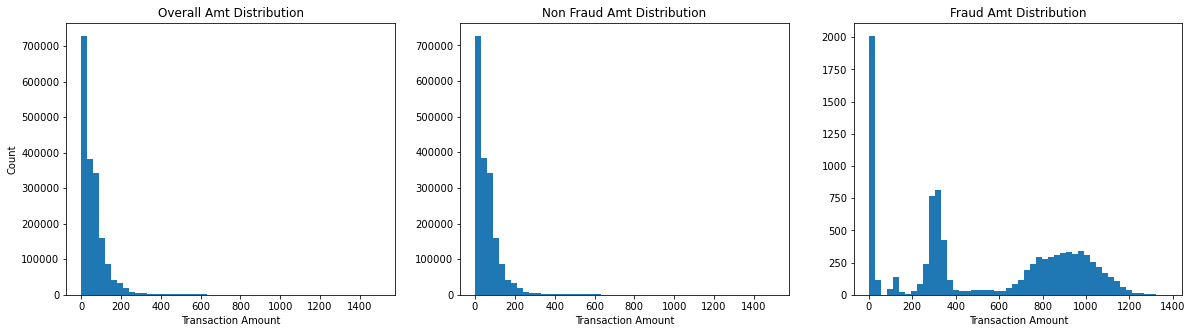

In [33]:
fig, ax = plt.subplots(1, 3, figsize=[20, 5])
ax[0].hist(df[df["amt"] <= 1500]["amt"], bins=50)
ax[0].set_title("Overall Amt Distribution")
ax[0].set_xlabel("Transaction Amount")
ax[0].set_ylabel("Count")

ax[1].hist(df[(df["is_fraud"] == 0) & (df["amt"] <= 1500)]["amt"], bins=50)
ax[1].set_title("Non Fraud Amt Distribution")
ax[1].set_xlabel("Transaction Amount")

ax[2].hist(df[(df["is_fraud"] == 1) & (df["amt"] <= 1500)]["amt"], bins=50)
ax[2].set_title("Fraud Amt Distribution")
ax[2].set_xlabel("Transaction Amount")

plt.show()

Mean and distribution of Fraud Transactions is different from Non Fraud Transactions

Mean of Non Fraud Transaction : 67.65 \
Mean of Fraud Transaction     : 530.66 

Fraud transactions are mostly concentrated between 1 to 50, 200 to 400 and 600 to 1200

### Timeline Plots

#### Year Month vs Number of Transactions

In [34]:
df_timeline01 = df.groupby('year_month')['trans_num','cc_num'].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01.head()

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910


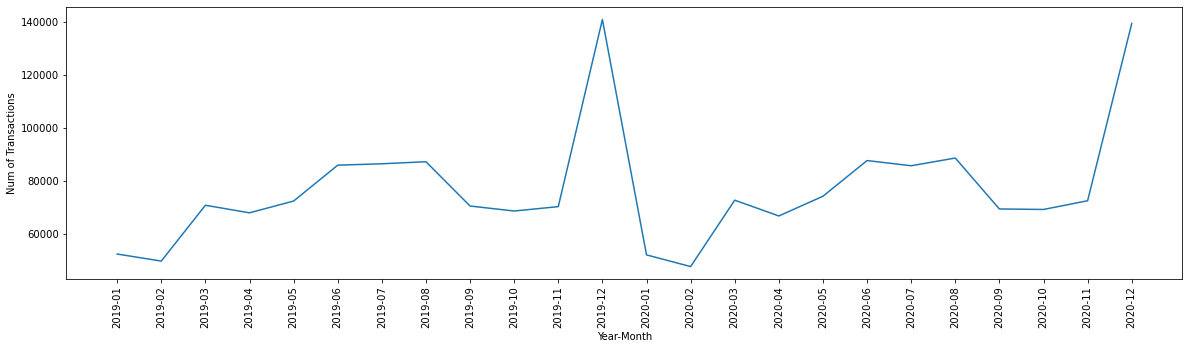

In [35]:
plt.figure(figsize = [20,5])
x = np.arange(0, len(df_timeline01))
plt.plot(x, df_timeline01['num_of_transactions'])
plt.xticks(x, df_timeline01['year_month'])
plt.xticks(rotation = 90)
plt.xlabel("Year-Month")
plt.ylabel("Num of Transactions")
plt.show()

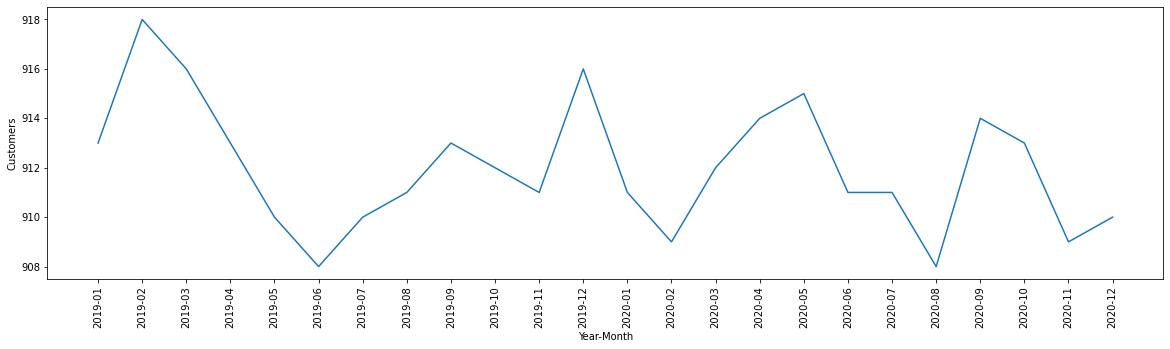

In [36]:
plt.figure(figsize = [20,5])
x = np.arange(0, len(df_timeline01))
plt.plot(x, df_timeline01['customers'])
plt.xticks(x, df_timeline01['year_month'])
plt.xticks(rotation = 90)
plt.xlabel("Year-Month")
plt.ylabel("Customers")
plt.show()

Maximum transactions are happening in the month of december

#### Fraud Transactions

In [37]:
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby('year_month')['trans_num','cc_num'].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','customers']
df_timeline02.head()

,year_month,num_of_fraud_transactions,customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42


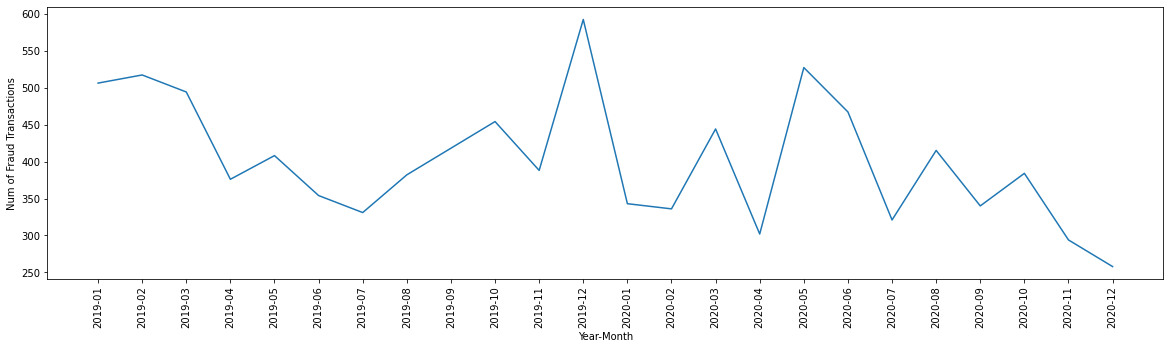

In [38]:
plt.figure(figsize = [20,5])
x = np.arange(0, len(df_timeline02))
plt.plot(x, df_timeline02['num_of_fraud_transactions'])
plt.xticks(x, df_timeline02['year_month'])
plt.xticks(rotation = 90)
plt.xlabel("Year-Month")
plt.ylabel("Num of Fraud Transactions")
plt.show()

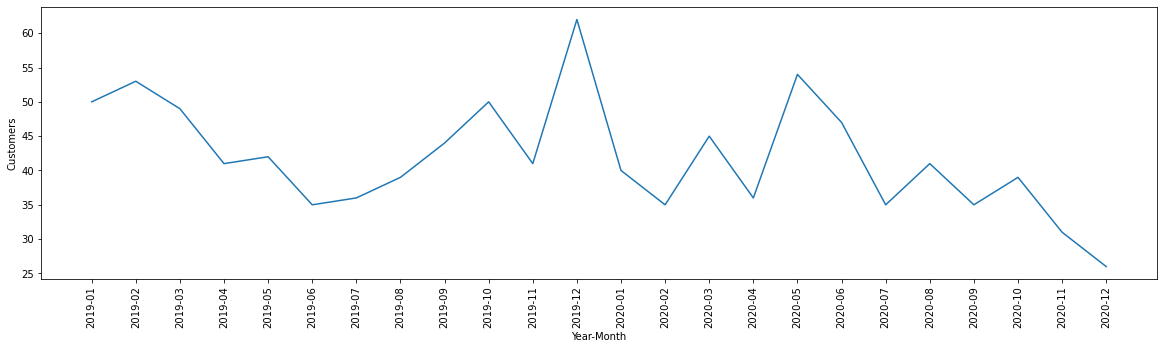

In [39]:
plt.figure(figsize = [20,5])
x = np.arange(0, len(df_timeline02))
plt.plot(x, df_timeline02['customers'])
plt.xticks(x, df_timeline02['year_month'])
plt.xticks(rotation = 90)
plt.xlabel("Year-Month")
plt.ylabel("Customers")
plt.show()

Fraud transaction reapeated for same customers credit card, it indicates more than one transaction happen with the same customer credit card. 

#### Gender

In [40]:
pd.concat([ df["gender"].value_counts().reset_index().rename(columns = {"index":"Gender", "gender":"Count"}),
         (df["gender"].value_counts(normalize = True)*100).reset_index().drop("index", axis = 1).\
          rename(columns = {"gender":"Percentage"})], axis = 1)

,Gender,Count,Percentage
0,F,1014749,54.780408
1,M,837645,45.219592


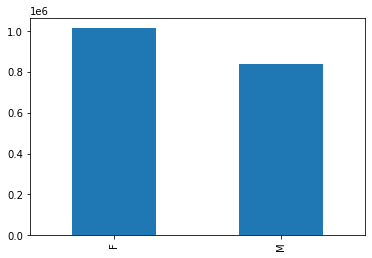

In [41]:
df["gender"].value_counts().plot.bar()
plt.show()

In [42]:
df_fraud_gender = df.groupby(["gender", "is_fraud"])[["trans_num"]].count().reset_index()
df_fraud_gender.columns = ["Gender", "is_fraud", "Count"]
df_fraud_gender

,Gender,is_fraud,Count
0,F,0,1009850
1,F,1,4899
2,M,0,832893
3,M,1,4752


In [43]:
df_gender = df.groupby("gender")["is_fraud"].count().reset_index().rename(columns = {"gender" : "Gender", "is_fraud" : "Gender_count"})
df_gender

,Gender,Gender_count
0,F,1014749
1,M,837645


In [44]:
df_fraud_gender = df_fraud_gender.merge(df_gender, on = "Gender", how = 'inner')
df_fraud_gender

,Gender,is_fraud,Count,Gender_count
0,F,0,1009850,1014749
1,F,1,4899,1014749
2,M,0,832893,837645
3,M,1,4752,837645


In [45]:
df_fraud_gender["Percentage"] = df_fraud_gender["Count"] / df_fraud_gender["Gender_count"]*100
df_fraud_gender

,Gender,is_fraud,Count,Gender_count,Percentage
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


No much difference in fraud percentage of Male & Female

#### Category

In [46]:
df["category"].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

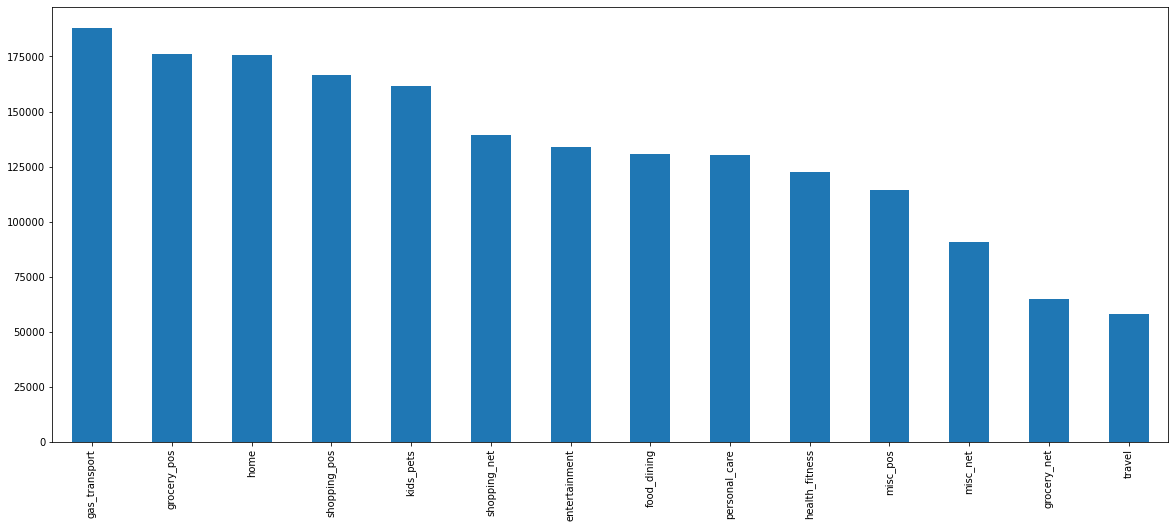

In [47]:
plt.figure(figsize = [20,8])
df["category"].value_counts().plot.bar()
plt.show()

In [48]:
df_category = df["category"].value_counts().reset_index().rename(columns = {"index" : "Category", "category" : "Category_count"})
df_category

,Category,Category_count
0,gas_transport,188029
1,grocery_pos,176191
2,home,175460
3,shopping_pos,166463
4,kids_pets,161727
5,shopping_net,139322
6,entertainment,134118
7,food_dining,130729
8,personal_care,130085
9,health_fitness,122553


In [49]:
df_category = df_category.merge((df["category"].value_counts(normalize = True)*100).reset_index().\
                                rename(columns = {"index" : "Category", "category" : "Percentage"}), 
                                on = "Category", how = "inner")
df_category

,Category,Category_count,Percentage
0,gas_transport,188029,10.150594
1,grocery_pos,176191,9.511529
2,home,175460,9.472067
3,shopping_pos,166463,8.986371
4,kids_pets,161727,8.730702
5,shopping_net,139322,7.521186
6,entertainment,134118,7.240252
7,food_dining,130729,7.057300
8,personal_care,130085,7.022534
9,health_fitness,122553,6.615925


In [50]:
df_fraud_category = df.groupby(["category", "is_fraud"])["trans_num"].count().reset_index()
df_fraud_category.columns = ["Category", "is_fraud", "Count"]
df_fraud_category = df_fraud_category.merge(df_category, on = "Category", how = "inner")
df_fraud_category["percent_grp"] = df_fraud_category["Count"] / df_fraud_category["Category_count"] * 100
df_fraud_category

,Category,is_fraud,Count,Category_count,Percentage,percent_grp
0,entertainment,0,133826,134118,7.240252,99.782281
1,entertainment,1,292,134118,7.240252,0.217719
2,food_dining,0,130524,130729,7.057300,99.843187
3,food_dining,1,205,130729,7.057300,0.156813
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
6,grocery_net,0,64703,64878,3.502387,99.730263
7,grocery_net,1,175,64878,3.502387,0.269737
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537


In [51]:
df_fraud_category.sort_values("Category_count", ascending = False)

,Category,is_fraud,Count,Category_count,Percentage,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


In [52]:
df_fraud_cat = df_fraud_category[df_fraud_category["is_fraud"] == 1].sort_values("percent_grp")
df_fraud_cat

,Category,is_fraud,Count,Category_count,Percentage,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


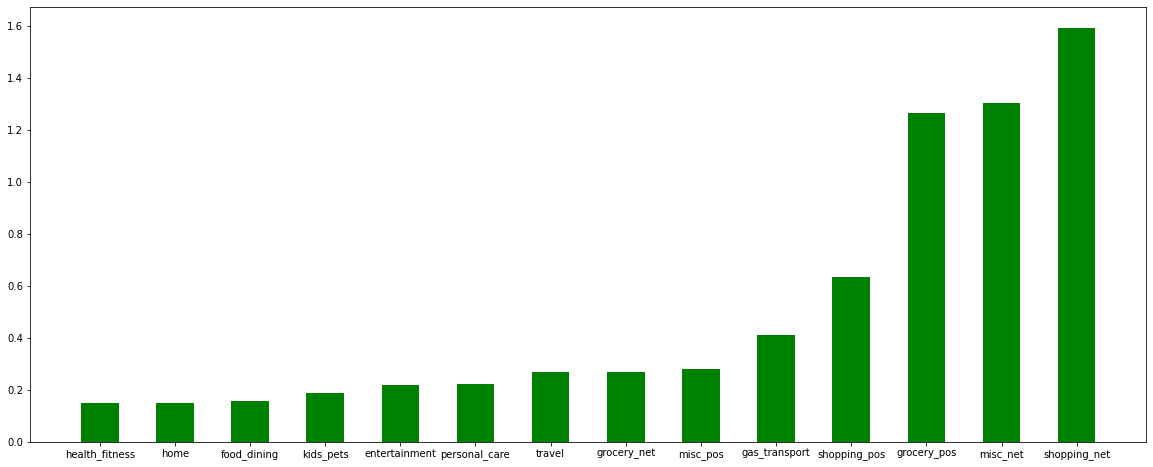

In [53]:
plt.figure(figsize = [20,8])
plt.bar(df_fraud_cat["Category"], df_fraud_cat["percent_grp"], color = 'green', width = 0.5)
plt.show()

Among all categories shopping_net, misc_net and grocery_pos shows higher percentage of fraud transactions

#### Merchant

In [54]:
df["merchant"].value_counts(normalize=True)

fraud_Kilback LLC                             0.003380
fraud_Cormier LLC                             0.002832
fraud_Schumm PLC                              0.002804
fraud_Kuhn LLC                                0.002716
fraud_Boyer PLC                               0.002699
fraud_Dickinson Ltd                           0.002674
fraud_Emard Inc                               0.002088
fraud_Cummerata-Jones                         0.002084
fraud_Corwin-Collins                          0.002080
fraud_Rodriguez Group                         0.002075
fraud_Kling Inc                               0.002074
fraud_Parisian and Sons                       0.002072
fraud_Erdman-Kertzmann                        0.002072
fraud_Huels-Hahn                              0.002070
fraud_Stroman, Hudson and Erdman              0.002067
fraud_Kutch LLC                               0.002067
fraud_Jenkins, Hauck and Friesen              0.002061
fraud_Prohaska-Murray                         0.002056
fraud_Olso

In [55]:
df_fraud_merchant = df.groupby("merchant")["is_fraud"].agg(["sum", "count", "mean"]).sort_values("mean", ascending=False).reset_index()
df_fraud_merchant.columns = ["Merchant", "Fraud_Count", "Merchant_count", "Percent_grp"]
df_fraud_merchant["Percent_grp"] = df_fraud_merchant["Percent_grp"]*100
df_fraud_merchant

,Merchant,Fraud_Count,Merchant_count,Percent_grp
0,fraud_Kozey-Boehm,60,2758,2.175489
1,"fraud_Herman, Treutel and Dickens",38,1870,2.032086
2,fraud_Terry-Huel,56,2864,1.955307
3,fraud_Kerluke-Abshire,50,2635,1.897533
4,"fraud_Mosciski, Ziemann and Farrell",53,2821,1.878766
5,"fraud_Schmeler, Bashirian and Price",52,2788,1.865136
6,fraud_Kuhic LLC,53,2842,1.864884
7,fraud_Jast Ltd,51,2757,1.849837
8,"fraud_Langworth, Boehm and Gulgowski",52,2817,1.845935
9,"fraud_Romaguera, Cruickshank and Greenholt",51,2767,1.843151


#### OneHotEncoding

Encoding the categorical variables "gender", "day_of_week", "category"

In [56]:
dumm_cols = ["gender", "day_of_week", "category"]
card_dummies = pd.get_dummies(df[dumm_cols], drop_first = True)
card_dummies

,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
df3 = pd.concat([df, card_dummies], axis = 1)
df3.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age_yrs,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
df3.shape

(1852394, 46)

In [59]:
# Function to calculate distance between customer and merchant

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [60]:
df3['dist'] = haversine(df3['lat'], df3['long'], df3['merch_lat'], df3['merch_long'])

In [61]:
df3['dist'].describe()

count   1852394.000000
mean         76.111726
std          29.116970
min           0.022255
25%          55.320087
50%          78.216380
75%          98.509467
max         152.117173
Name: dist, dtype: float64

In [62]:
df3.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age_yrs', 'gender_M', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'dist'],
      dtype='object')

In [63]:
# columns to be used for modelling

cols = ['amt', 'city_pop', 'trans_hour', 'age_yrs', 'gender_M', 'day_of_week_Monday', 'day_of_week_Tuesday', 
        'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Saturday', 'day_of_week_Sunday',  
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos',
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'dist', 'is_fraud']

In [64]:
len(cols)

26

In [65]:
corr = df3[cols].corr()

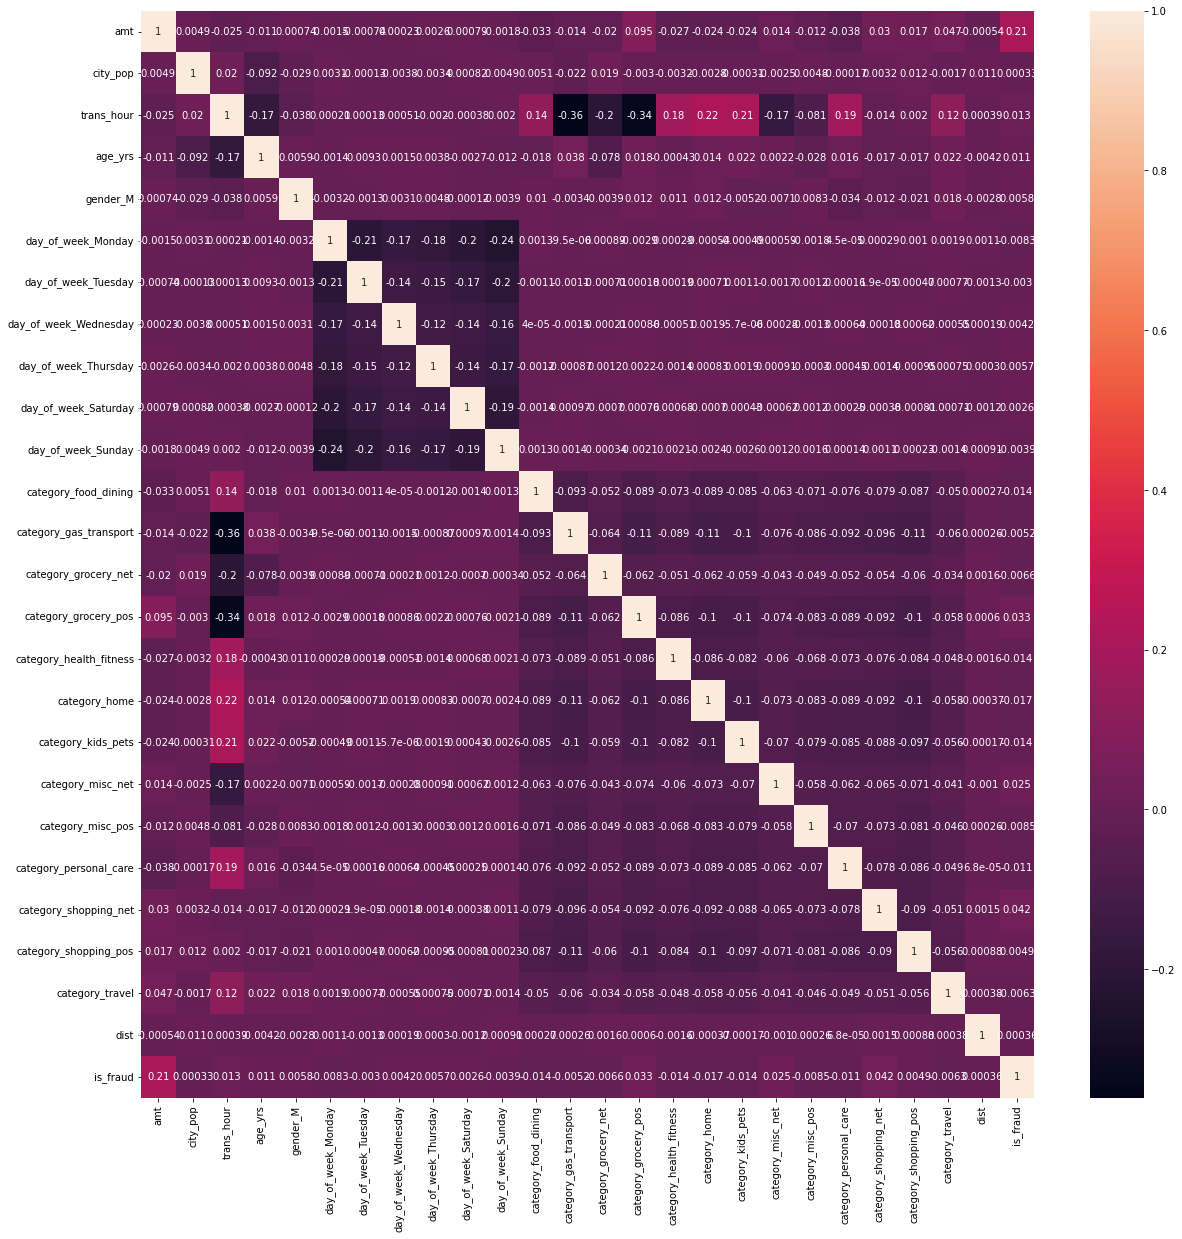

In [66]:
plt.figure(figsize=[20,20])
sns.heatmap(corr, annot = True)
plt.show()

In [67]:
df3.shape

(1852394, 47)

### Model Building

In [68]:
# Train, Test split

X_cols = ['amt', 'city_pop', 'trans_hour', 'age_yrs', 'gender_M', 'day_of_week_Monday', 'day_of_week_Tuesday', 
        'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Saturday', 'day_of_week_Sunday',  
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos',
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'dist']

Y_cols = ['is_fraud']

In [69]:
df3_initial_train = df3.loc[(df3['trans_date_trans_time'] <= '2020-06-21 12:13:37')][cols]
df3_initial_train

,amt,city_pop,trans_hour,age_yrs,gender_M,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Saturday,day_of_week_Sunday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dist,is_fraud
0,4.970000,3495,0,31.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,78.597568,0
1,107.230000,149,0,41.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.212176,0
2,220.110000,4154,0,57.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.206083,0
3,45.000000,1939,0,52.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95.673231,0
4,41.960000,99,0,33.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77.556744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.560000,258,12,59.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,119.752136,0
1296671,51.700000,100,12,41.000000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,75.104085,0
1296672,105.930000,899,12,53.000000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,99.047734,0
1296673,74.900000,1126,12,40.000000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,84.627652,0


In [70]:
X_train = df3_initial_train.drop("is_fraud", axis=1)
Y_train = df3_initial_train["is_fraud"]

In [71]:
X_train.shape, Y_train.shape

((1296675, 25), (1296675,))

In [72]:
# Handling class imbalnce by Random OverSampling

from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_overampled_train, Y_overampled_train = over_sample.fit_resample(X_train, Y_train)
len(X_overampled_train)

2578338

In [73]:
from collections import Counter
print(sorted(Counter(Y_overampled_train).items()))

[(0, 1289169), (1, 1289169)]


In [74]:
Y_overampled_train.value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [75]:
X_overampled_train.shape, Y_overampled_train.shape

((2578338, 25), (2578338,))

In [76]:
# Test data

X_test_initial = df3.loc[(df3['trans_date_trans_time'] >= '2020-06-21 12:14:25')][X_cols]
Y_test_initial = df3.loc[(df3['trans_date_trans_time'] >= '2020-06-21 12:14:25')][Y_cols]

In [77]:
X_test_initial.shape, Y_test_initial.shape

((555719, 25), (555719, 1))

#### Model Training

##### Logistic Regression

In [78]:
# Training LR model with oversampled data 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lreg_os = LogisticRegression(random_state=42)
lreg_os.fit(X_overampled_train, Y_overampled_train)

LogisticRegression(random_state=42)

In [79]:
Y_train_pred_os = lreg_os.predict(X_overampled_train)
Y_test_pred = lreg_os.predict(X_test_initial)

In [80]:
# Evaluationg LR model on Training data

print ('\n confussion matrix:\n', confusion_matrix(Y_overampled_train, Y_train_pred_os))
print ('\n clasification report:\n', classification_report(Y_overampled_train, Y_train_pred_os))


 confussion matrix:
 [[1206818   82351]
 [ 320515  968654]]

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86   1289169
           1       0.92      0.75      0.83   1289169

    accuracy                           0.84   2578338
   macro avg       0.86      0.84      0.84   2578338
weighted avg       0.86      0.84      0.84   2578338



In [81]:
# Evaluationg LR model on Test data

print ('\n confussion matrix:\n', confusion_matrix(Y_test_initial, Y_test_pred))
print ('\n clasification report:\n', classification_report(Y_test_initial, Y_test_pred))


 confussion matrix:
 [[519025  34549]
 [   560   1585]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.04      0.74      0.08      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.84      0.53    555719
weighted avg       1.00      0.94      0.96    555719



In [82]:
# Handling class imbalnce by SMOTE

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_smote_train, Y_smote_train = smt.fit_resample(X_train, Y_train)
len(X_smote_train)

2578338

In [83]:
Y_smote_train.value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [84]:
# Training LR model with SMOTE data 

from sklearn.linear_model import LogisticRegression

lreg_smt = LogisticRegression(random_state=42)
lreg_smt.fit(X_smote_train, Y_smote_train)

LogisticRegression(random_state=42)

In [85]:
Y_train_pred_smt = lreg_smt.predict(X_smote_train)
Y_test_pred_smt = lreg_smt.predict(X_test_initial)

In [86]:
# Evaluationg LR model on Training data

print ('\n confussion matrix:\n', confusion_matrix(Y_smote_train, Y_train_pred_smt))
print ('\n clasification report:\n', classification_report(Y_smote_train, Y_train_pred_smt))


 confussion matrix:
 [[1194757   94412]
 [ 306462  982707]]

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86   1289169
           1       0.91      0.76      0.83   1289169

    accuracy                           0.84   2578338
   macro avg       0.85      0.84      0.84   2578338
weighted avg       0.85      0.84      0.84   2578338



In [87]:
# Evaluationg LR model on Test data

print ('\n confussion matrix:\n', confusion_matrix(Y_test_initial, Y_test_pred_smt))
print ('\n clasification report:\n', classification_report(Y_test_initial, Y_test_pred_smt))


 confussion matrix:
 [[513771  39803]
 [   541   1604]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.75      0.07      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719



There is no significant change observed in the classification report by either class imbalance handling technique i.e Oversampling or SMOTE 

##### RFECV for feature selection

In [88]:
num_features = X_overampled_train.shape
num_features[1]

25

In [89]:
cv_scores = []

In [90]:
logreg = LogisticRegression(random_state=42)

In [91]:
from sklearn.feature_selection import RFECV

In [92]:
rfecv = RFECV(estimator=logreg, cv=4)

In [93]:
%%time
rfecv.fit(X_overampled_train, Y_overampled_train)

Wall time: 26min 24s


RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [94]:
rfecv.grid_scores_

array([[0.57704414, 0.57739631, 0.57656256, 0.57681699],
       [0.61386939, 0.61406797, 0.61379743, 0.61318773],
       [0.68259733, 0.68288744, 0.68309949, 0.68191733],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.69437545, 0.69450064, 0.69332779],
       [0.69318088, 0.68393773, 0.68455159, 0.68257512],
       [0.68511988, 0.68433488,

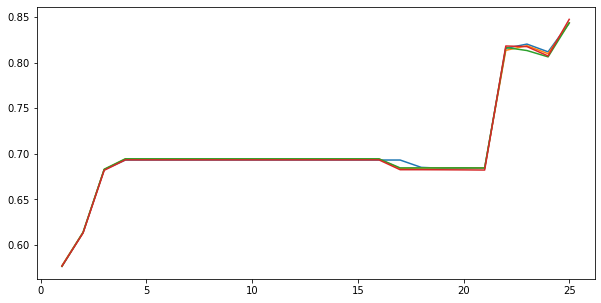

In [95]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [96]:
rfecv.n_features_

25

From above it is clear that all 25 features of the dataset are important.\

With all 25 features we have already made a LR model in which we found that there is drastical fall in the Precison value of the test data from train data. It shows the model is overfitted, hence will try to build Decision Tree model. 

#### Decision Tree

In [97]:
# Training DT model with oversampled data 

from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dtc_os.fit(X_overampled_train, Y_overampled_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [98]:
# Evaluationg DT model on Training data

Y_train_pred_os = dtc_os.predict(X_overampled_train)
print ('\n confussion matrix:\n', confusion_matrix(Y_overampled_train, Y_train_pred_os))
print ('\n clasification report:\n', classification_report(Y_overampled_train, Y_train_pred_os))


 confussion matrix:
 [[1280474    8695]
 [      0 1289169]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.99      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [99]:
# Evaluationg DT model on Test data

Y_test_pred = dtc_os.predict(X_test_initial)
print ('\n confussion matrix:\n', confusion_matrix(Y_test_initial, Y_test_pred))
print ('\n clasification report:\n', classification_report(Y_test_initial, Y_test_pred))


 confussion matrix:
 [[549773   3801]
 [   217   1928]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.34      0.90      0.49      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.95      0.74    555719
weighted avg       1.00      0.99      0.99    555719



##### Hyper-Parameter Tuning

In [100]:
dt_os = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

In [101]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [102]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_os, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")

In [103]:
%%time
grid_search.fit(X_overampled_train, Y_overampled_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 17min 3s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='precision', verbose=1)

In [104]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,14.899784,0.684462,1.386523,0.105900,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.969193,0.968821,0.968317,0.969039,0.968843,0.000331,36
1,14.963978,0.640725,1.389496,0.120643,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.969193,0.968821,0.968317,0.969039,0.968843,0.000331,36
2,14.844431,0.382563,1.203091,0.061514,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.969193,0.968821,0.968317,0.969039,0.968843,0.000331,36
3,15.304355,0.701406,1.394488,0.105613,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.969193,0.968821,0.968317,0.969039,0.968843,0.000331,36
4,15.542472,0.569102,1.257776,0.083045,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.969193,0.968821,0.968317,0.969039,0.968843,0.000331,36


In [105]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
20,65.273721,2.005802,1.496045,0.166229,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.993107,0.991602,0.993532,0.993434,0.992919,0.000777,1
21,64.820315,2.373550,1.351520,0.032210,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.993015,0.991467,0.993422,0.993404,0.992827,0.000802,2
22,68.122667,1.458116,1.567568,0.087302,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.992563,0.990988,0.992951,0.992841,0.992336,0.000791,3
45,55.072463,1.581374,1.468702,0.067204,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.991151,0.991584,0.991624,0.991929,0.991572,0.000277,4
46,56.841085,1.345995,1.406336,0.071684,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.990981,0.991471,0.991185,0.991584,0.991305,0.000237,5


In [106]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [107]:
dt_best = grid_search.best_estimator_

In [108]:
# Evaluationg tunned DT model on Training data

Y_train_pred_os = dt_best.predict(X_overampled_train)
print ('\n confussion matrix:\n', confusion_matrix(Y_overampled_train, Y_train_pred_os))
print ('\n clasification report:\n', classification_report(Y_overampled_train, Y_train_pred_os))


 confussion matrix:
 [[1280869    8300]
 [      0 1289169]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.99      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [109]:
# Evaluationg tunned DT model on Test data

Y_test_pred = dt_best.predict(X_test_initial)
print ('\n confussion matrix:\n', confusion_matrix(Y_test_initial, Y_test_pred))
print ('\n clasification report:\n', classification_report(Y_test_initial, Y_test_pred))


 confussion matrix:
 [[549905   3669]
 [   200   1945]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.35      0.91      0.50      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.95      0.75    555719
weighted avg       1.00      0.99      0.99    555719



There is drastical fall in the Precison value of the test data from train data. It shows the model is overfitted, hence will try to Random Forest model.

#### Random Forest

In [110]:
# Training Ramdom Forest model with oversampled data

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=345)

In [111]:
hyper_params = { 
                'n_estimators': [50],
                'max_depth' : [8,16,20],
                }

In [112]:
model_rf = GridSearchCV(estimator=rf_clf, 
                        param_grid=hyper_params,
                        verbose=1,
                        cv=5,
                        return_train_score=True,
                        n_jobs=-1)

In [113]:
%%time
model_rf.fit(X_overampled_train, Y_overampled_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 35min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=345),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 20], 'n_estimators': [50]},
             return_train_score=True, verbose=1)

In [114]:
model_rf.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345)

In [115]:
model_rf.best_score_

0.9986301252607636

In [116]:
rf_best = model_rf.best_estimator_

In [117]:
# Evaluationg tunned RF model on Training data

Y_train_pred_os = rf_best.predict(X_overampled_train)
print ('\n confussion matrix:\n', confusion_matrix(Y_overampled_train, Y_train_pred_os))
print ('\n clasification report:\n', classification_report(Y_overampled_train, Y_train_pred_os))


 confussion matrix:
 [[1286361    2808]
 [      0 1289169]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [118]:
# Evaluationg tunned RF model on Test data

Y_test_pred = rf_best.predict(X_test_initial)
print ('\n confussion matrix:\n', confusion_matrix(Y_test_initial, Y_test_pred))
print ('\n clasification report:\n', classification_report(Y_test_initial, Y_test_pred))


 confussion matrix:
 [[552222   1352]
 [   259   1886]]

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.58      0.88      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.79      0.94      0.85    555719
weighted avg       1.00      1.00      1.00    555719



#### Derive Historical Variables

In [119]:
df3.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age_yrs,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dist
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,78.597568
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.212176
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.206083
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95.673231
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77.556744


In [120]:
df3.index = df3['trans_date_trans_time']
df3.index.name = "time_index"
df3 = df3.sort_index()
df3.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age_yrs,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dist
time_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,78.597568
2019-01-01 00:00:44,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.212176
2019-01-01 00:00:51,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.206083
2019-01-01 00:01:16,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95.673231
2019-01-01 00:03:06,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77.556744


##### Orders in last 2 Months

In [121]:
df3['val_for_agg'] = 1

##### 60 Day Transactions by Customers

In [122]:
df_hist_trans_60d = df3.groupby(['cc_num'])['val_for_agg'].rolling('60D').count().shift().reset_index().fillna(0)
df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [123]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [124]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [125]:
df_hist_trans_60d.head()

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,1.000000
2,60416207185,2019-01-03,5.000000
3,60416207185,2019-01-04,7.000000
4,60416207185,2019-01-05,9.000000


##### 24 hrs. orders by Customers

In [126]:
df_hist_orders_24h = df3.groupby(['cc_num'])['val_for_agg'].rolling('24H').count().shift().reset_index().fillna(0)
df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']
df_hist_orders_24h.head()

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.000000
1,60416207185,2019-01-02 08:44:57,1.000000
2,60416207185,2019-01-02 08:47:36,2.000000
3,60416207185,2019-01-02 12:38:14,3.000000
4,60416207185,2019-01-02 13:10:46,4.000000


##### 24 Hours Fraud Orders by Customers

In [127]:
df_hist_fraud_trans_24h = df3[df3['is_fraud']== 1].groupby(['cc_num'])['val_for_agg'].rolling('24H').count().\
                          shift().reset_index().fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [128]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,3.000000
4,60416207185,2019-03-02 22:10:59,2.000000


In [129]:
df_hist_fraud_trans_24h.shape

(9651, 3)

##### 2 Hour Fraud Orders by Customers

In [130]:
df_hist_fraud_trans_2h = df3[df3['is_fraud']== 1].groupby(['cc_num'])['val_for_agg'].rolling('2H').count().shift().\
                         reset_index().fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [131]:
df_hist_fraud_trans_2h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.000000
1,60416207185,2019-03-01 02:42:25,1.000000
2,60416207185,2019-03-01 23:06:58,2.000000
3,60416207185,2019-03-02 22:10:38,1.000000
4,60416207185,2019-03-02 22:10:59,1.000000


##### 60 Day Orders Amt Avg by Customers

In [132]:
df_hist_trans_amt_avg_60d = df3.groupby(['cc_num'])['amt'].rolling('60D').mean().shift(1).reset_index().fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [133]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [134]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
                            ['hist_trans_avg_amt_60d'].min().reset_index()

In [135]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


#### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [136]:
df3['trans_date'] = df3['trans_date_trans_time'].dt.date

In [137]:
df4 = df3.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [138]:
df4 = df4.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df4 = df4.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df4 = df4.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df4 = df4.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [139]:
df4[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df4[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [140]:
df4.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,day_of_week,year_month,age_yrs,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dist,val_for_agg,trans_date,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_fraud_trans_2h,hist_trans_avg_amt_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,31.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,78.597568,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,41.000000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.212176,1,2019-01-01,1.000000,1.000000,0.000000,0.000000,47.488421
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,57.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.206083,1,2019-01-01,8.000000,5.000000,0.000000,0.000000,377.925000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,52.000000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95.673231,1,2019-01-01,1.000000,5.000000,0.000000,0.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,33.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77.556744,1,2019-01-01,1.000000,6.000000,0.000000,0.000000,41.960000


In [141]:
df4['hist_fraud_trans_24h'] = df4['hist_fraud_trans_24h'] - df4['hist_fraud_trans_2h']

In [142]:
cols = ['amt', 'city_pop', 'trans_hour', 'age_yrs', 'gender_M', 'day_of_week_Monday', 'day_of_week_Tuesday', 
        'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Saturday', 'day_of_week_Sunday',  
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos',
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'dist', 
        'hist_trans_60d','hist_trans_24h', 'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [143]:
corr = df4[cols].corr()

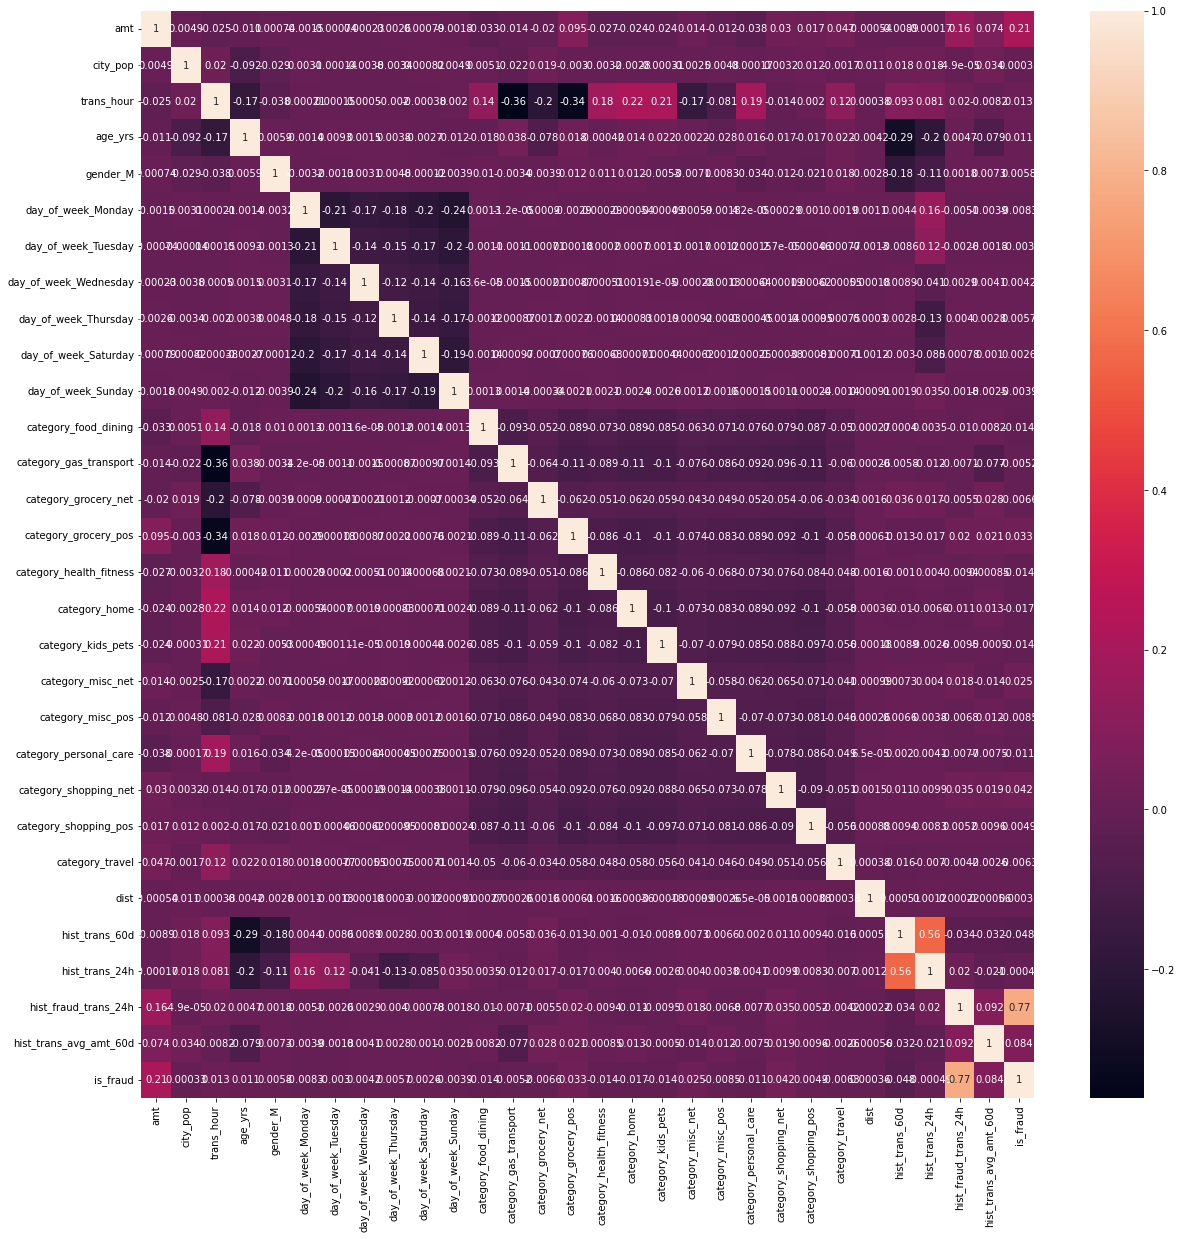

In [144]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

#### Train and Test Split

In [145]:
X_cols = ['amt', 'city_pop', 'trans_hour', 'age_yrs', 'gender_M', 'day_of_week_Monday', 'day_of_week_Tuesday', 
        'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Saturday', 'day_of_week_Sunday',  
        'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 
        'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos',
        'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'dist', 
        'hist_trans_60d','hist_trans_24h', 'hist_fraud_trans_24h','hist_trans_avg_amt_60d']

Y_cols = ['is_fraud']

In [146]:
df4_train = df4.loc[(df4['trans_date_trans_time'] <= '2020-06-21 12:13:37')][cols]
df4_train

,amt,city_pop,trans_hour,age_yrs,gender_M,day_of_week_Monday,day_of_week_Tuesday,day_of_week_Wednesday,day_of_week_Thursday,day_of_week_Saturday,day_of_week_Sunday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,dist,hist_trans_60d,hist_trans_24h,hist_fraud_trans_24h,hist_trans_avg_amt_60d,is_fraud
0,4.970000,3495,0,31.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,78.597568,1.000000,6.000000,0.000000,4.970000,0
1,107.230000,149,0,41.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30.212176,1.000000,1.000000,0.000000,47.488421,0
2,220.110000,4154,0,57.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108.206083,8.000000,5.000000,0.000000,377.925000,0
3,45.000000,1939,0,52.000000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,95.673231,1.000000,5.000000,0.000000,45.000000,0
4,41.960000,99,0,33.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,77.556744,1.000000,6.000000,0.000000,41.960000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296710,15.560000,258,12,59.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,119.752136,161.000000,3.000000,0.000000,65.066424,0
1296711,51.700000,100,12,41.000000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,75.104085,51.000000,1.000000,0.000000,88.974340,0
1296712,105.930000,899,12,53.000000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,99.047734,249.000000,4.000000,0.000000,56.443080,0
1296713,74.900000,1126,12,40.000000,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,84.627652,249.000000,4.000000,0.000000,92.517912,0


In [147]:
X_train_final = df4_train.drop("is_fraud", axis = 1)
Y_train_final = df4_train["is_fraud"]

In [148]:
X_train_final.shape, Y_train_final.shape

((1296715, 29), (1296715,))

In [149]:
# Handling class imbalance by Ramdom Oversampling

from imblearn.over_sampling import RandomOverSampler
over_sample_final = RandomOverSampler(sampling_strategy = 1)
X_os_train, Y_os_train = over_sample_final.fit_resample(X_train_final, Y_train_final)
len(X_os_train)

2578418

In [150]:
Y_os_train.value_counts()

0    1289209
1    1289209
Name: is_fraud, dtype: int64

In [151]:
X_os_train.shape, Y_os_train.shape

((2578418, 29), (2578418,))

In [152]:
# Test data

X_test_final = df4.loc[(df4['trans_date_trans_time'] >= '2020-06-21 12:14:25')][X_cols]
Y_test_final = df4.loc[(df4['trans_date_trans_time'] >= '2020-06-21 12:14:25')][Y_cols] 

In [153]:
X_test_final.shape, Y_test_final.shape

((555767, 29), (555767, 1))

#### Model Training

##### Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_os_train, Y_os_train)

LogisticRegression(random_state=42)

In [155]:
# Evaluationg LR model on training data

Y_train_pred = logreg.predict(X_os_train)

print('\n confusion matrix: \n', confusion_matrix(Y_os_train, Y_train_pred))
print('\n classification report: \n', classification_report(Y_os_train, Y_train_pred))


 confusion matrix: 
 [[1173567  115642]
 [ 309510  979699]]

 classification report: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85   1289209
           1       0.89      0.76      0.82   1289209

    accuracy                           0.84   2578418
   macro avg       0.84      0.84      0.83   2578418
weighted avg       0.84      0.84      0.83   2578418



In [156]:
# Evaluationg LR model on Test data

Y_test_pred = logreg.predict(X_test_final)

print('\n confusion matrix: \n', confusion_matrix(Y_test_final, Y_test_pred))
print('\n classification report: \n', classification_report(Y_test_final, Y_test_pred))


 confusion matrix: 
 [[522088  31534]
 [   604   1541]]

 classification report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    553622
           1       0.05      0.72      0.09      2145

    accuracy                           0.94    555767
   macro avg       0.52      0.83      0.53    555767
weighted avg       1.00      0.94      0.97    555767



##### Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_os_train, Y_os_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [158]:
# Evalustion DT model on Training data

Y_train_pred = dt_clf.predict(X_os_train)

print('\n confusion matrix: \n', confusion_matrix(Y_os_train, Y_train_pred))
print('\n classification report: \n', classification_report(Y_os_train, Y_train_pred))


 confusion matrix: 
 [[1287740    1469]
 [      0 1289209]]

 classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289209
           1       1.00      1.00      1.00   1289209

    accuracy                           1.00   2578418
   macro avg       1.00      1.00      1.00   2578418
weighted avg       1.00      1.00      1.00   2578418



In [159]:
# Evalustion DT model on Test data

Y_test_pred = dt_clf.predict(X_test_final)

print('\n confusion matrix: \n', confusion_matrix(Y_test_final, Y_test_pred))
print('\n classification report: \n', classification_report(Y_test_final, Y_test_pred))


 confusion matrix: 
 [[552953    669]
 [    92   2053]]

 classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553622
           1       0.75      0.96      0.84      2145

    accuracy                           1.00    555767
   macro avg       0.88      0.98      0.92    555767
weighted avg       1.00      1.00      1.00    555767



##### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=345)

In [161]:
hyper_params = {
                'n_estimators' : [50],
                'max_depth' : [8,16,20]
               }

In [162]:
model_rf = GridSearchCV(estimator = rf_clf,
                        param_grid = hyper_params,
                        verbose = 1,
                        cv=5,
                        return_train_score = True,
                        n_jobs = -1)

In [163]:
%%time
model_rf.fit(X_os_train, Y_os_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 31min 42s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=345),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 20], 'n_estimators': [50]},
             return_train_score=True, verbose=1)

In [164]:
model_rf.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345)

In [165]:
model_rf.best_score_

0.9997463562460787

In [166]:
rf_best = model_rf.best_estimator_

In [167]:
# Evalustion RF model on Training data

Y_train_pred = rf_best.predict(X_os_train)

print('\n confusion matrix: \n', confusion_matrix(Y_os_train, Y_train_pred))
print('\n classification report: \n', classification_report(Y_os_train, Y_train_pred))


 confusion matrix: 
 [[1289066     143]
 [      0 1289209]]

 classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289209
           1       1.00      1.00      1.00   1289209

    accuracy                           1.00   2578418
   macro avg       1.00      1.00      1.00   2578418
weighted avg       1.00      1.00      1.00   2578418



In [168]:
# Evalustion RF model on Test data

Y_test_pred = rf_best.predict(X_test_final)

print('\n confusion matrix: \n', confusion_matrix(Y_test_final, Y_test_pred))
print('\n classification report: \n', classification_report(Y_test_final, Y_test_pred))


 confusion matrix: 
 [[553544     78]
 [   109   2036]]

 classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553622
           1       0.96      0.95      0.96      2145

    accuracy                           1.00    555767
   macro avg       0.98      0.97      0.98    555767
weighted avg       1.00      1.00      1.00    555767



From above precison & recall values of fraud cases, will select Random Forest as our final model.